# Dynamics of Scalar Field 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Define modified time $T = log(1 + z)$ 
where, $z$ = Redshift parameter

C:\Users\A\AppData\Local\Temp\ipykernel_8180\3567941222.py:2: RuntimeWarning: invalid value encountered in log
  Time = np.log(1+z)


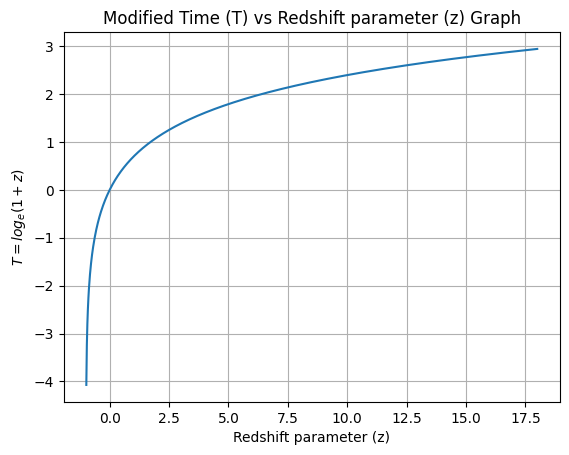

In [2]:
z = np.linspace(18,-4,1000)
Time = np.log(1+z)

plt.title('Modified Time (T) vs Redshift parameter (z) Graph')
plt.plot(z,Time)
plt.xlabel('Redshift parameter (z)')
plt.ylabel('$T = log_{e}(1+z)$')
plt.grid()

Define $a = \dfrac{1}{1 + z}$

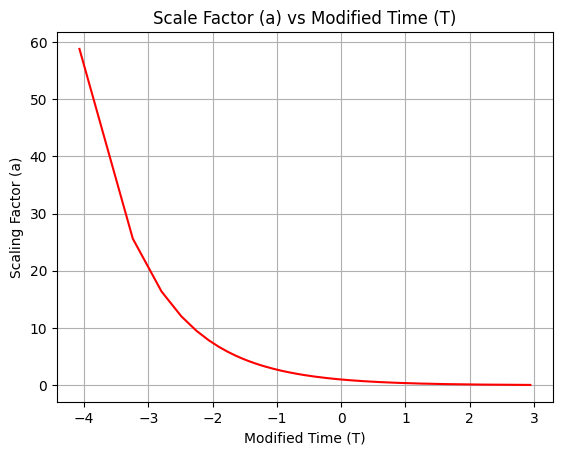

In [3]:
a = 1/(1+z)

plt.title('Scale Factor (a) vs Modified Time (T)')
plt.plot(Time,a,color = 'Red')
plt.xlabel('Modified Time (T)')
plt.ylabel('Scaling Factor (a)')
plt.grid()

In [4]:
from scipy.integrate import odeint


In [5]:
omega_m0 = 0.3
omega_r0 = omega_m0/(3301)
lamb = 4
n = 2.5

omega_m = (omega_m0)*np.exp(3*Time)
# Omega_m
omega_dark = 0.7
# For no dark energy contribution. but omega dark = 0


V0 = 1e10
def V(x,y,p):
        return (V0)*np.exp(-x*y**p) 

def deri_V(x,y,p):
        return  -x*V(x,y,p)*p*y**(p-1)

Text(0, 0.5, 'Scalar Field')

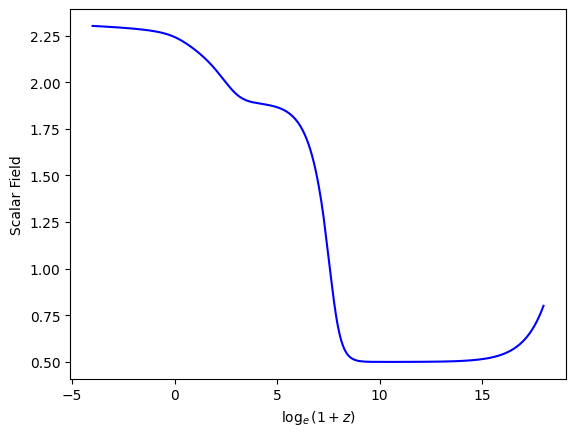

In [6]:
def DSDX(S,T):
    
    phi,deri_phi = S

    nrho_m = (omega_m0)*np.exp(3*T)
    # Omega_m

    nrho_r = (omega_r0)*np.exp(4*T)
    # Omega_r

    E_squared = (nrho_m + nrho_r + V(lamb,phi,n) + omega_dark)/(1 - ((deri_phi**2)/6))
    # E^2

    E = np.sqrt(E_squared)

    deri_E = (0.5/E)*(nrho_r) - (1.5/E)*(V(lamb,phi,n) + omega_dark) + (1.5*E)*(1 + ((deri_phi)**2)/6)
    # E'

    return [deri_phi, (3*deri_phi) - (deri_E*deri_phi)/E - (3*deri_V(lamb,phi,n))/E_squared]

phi0 = 0.8
deri_phi0 = 0.3
s0 = [phi0,deri_phi0]

Time = np.linspace(18,-4,1000)#np.log(1+np.linspace(10**8,0,10000))
sol = odeint(DSDX,s0,Time)

phi,deri_phi = sol.T

plt.plot(Time,phi,color = 'Blue')
plt.xlabel('$\log_{e}(1 + z)$')
plt.ylabel('Scalar Field')

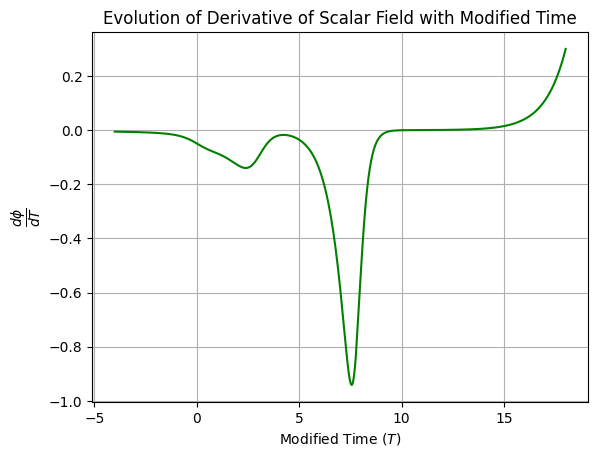

In [7]:
Time = np.linspace(18,-4,1000)#np.log(1+np.linspace(0,10000,10000))

plt.title('Evolution of Derivative of Scalar Field with Modified Time')
plt.plot(Time,sol.T[1],color = 'Green')
plt.xlabel('Modified Time ($T$)')
plt.ylabel('$\dfrac{d\phi}{dT}$')

plt.grid()

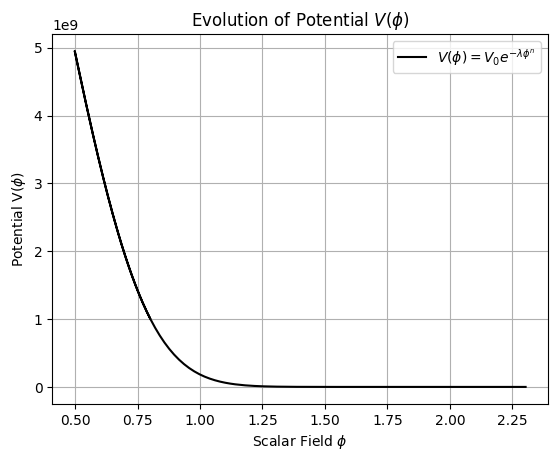

In [8]:

plt.title('Evolution of Potential $V(\phi)$')
plt.plot(phi,V(lamb,phi,n),color = 'Black',label = "$V(\phi) = V_{0}e^{-\lambda\phi^{n}}$")
plt.xlabel('Scalar Field $\phi$')
plt.ylabel('Potential V($\phi)$')

plt.grid()
plt.legend()

# Graph between Potential vs Phi

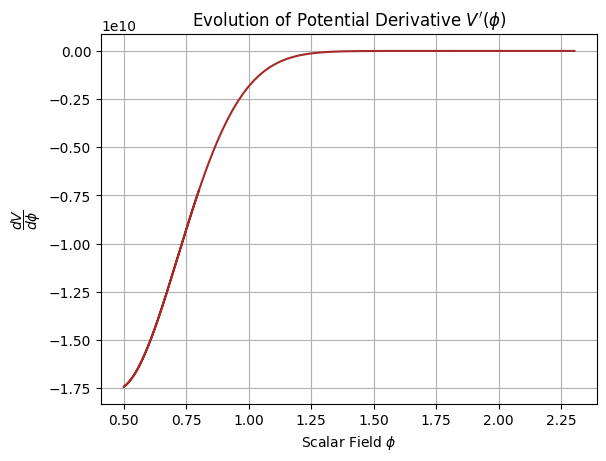

In [9]:


phi,deri_phi = sol.T
plt.title("Evolution of Potential Derivative $V'(\phi)$")
plt.plot(phi,deri_V(lamb,phi,n),color = 'Brown')
plt.xlabel('Scalar Field $\phi$')
plt.ylabel('$\dfrac{dV}{d\phi}$')

plt.grid()

# Graph for Deriavtive of Potential vs Phi

Text(0, 0.5, 'Normalised Hubble Paramter (E)')

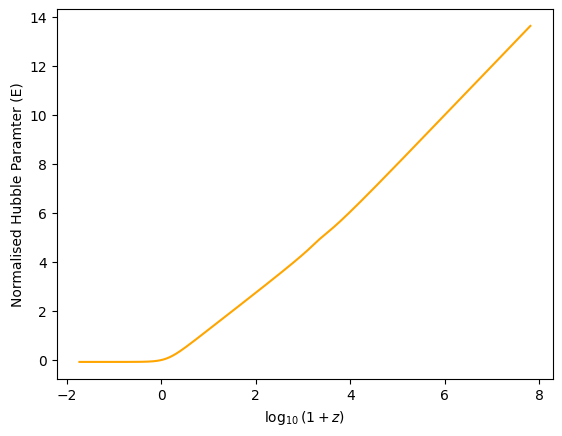

In [10]:
Time = np.linspace(18,-4,1000)#np.log(1 + np.linspace(0,10000,10000))

nrho_m = (omega_m0)*np.exp(3*Time)
nrho_r = (omega_r0)*np.exp(4*Time)

E_squared = (nrho_m + nrho_r + V(lamb,phi,n) + omega_dark)/(1-(deri_phi**2)/6)
E = np.sqrt(E_squared)

plt.plot(Time/np.log(10),np.log10(E),color = 'Orange')
plt.xlabel('$\log_{10}(1 + z)$')
plt.ylabel('Normalised Hubble Paramter (E)')

# Graph for Normalised Hubble vs Modified time

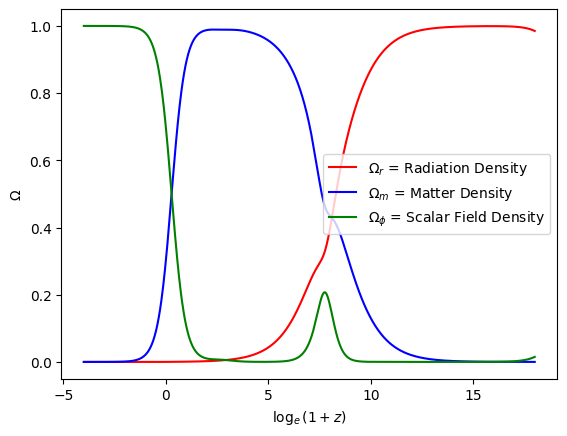

In [11]:
T = np.linspace(18,-4,1000)#np.log(1 + np.linspace(0,10000,10000))

omega_r = (omega_r0)*np.exp(4*T)/E_squared
omega_m = (omega_m0)*np.exp(3*T)/E_squared
omega_phi =  (1/6)*(deri_phi)**2 + (V(lamb,phi,n) + omega_dark)/E_squared

plt.plot(T,omega_r,color = 'red',label = "$\Omega_{r}$ = Radiation Density" )
plt.plot(T,omega_m,color = 'blue',label = "$\Omega_{m}$ = Matter Density")
plt.plot(T,omega_phi,color = 'green',label = "$\Omega_{\phi}$ = Scalar Field Density")

plt.xlabel('$\log_{e}(1 + z)$')
plt.ylabel('$\Omega$')

plt.legend(loc = 'center right')

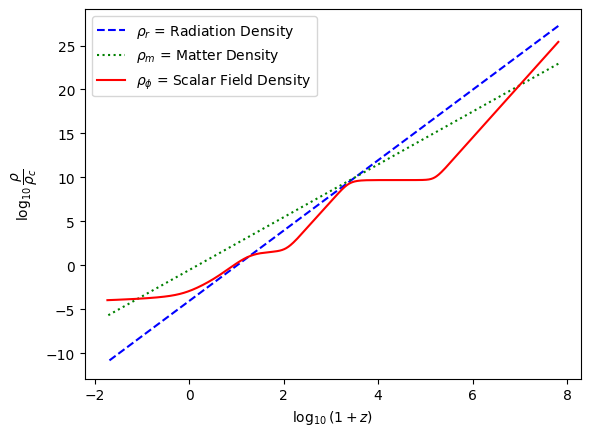

In [12]:
T = np.linspace(18,-4,1000)

rho_r = (omega_r0)*np.exp(4*T)
rho_m = (omega_m0)*np.exp(3*T)
rho_phi =  (1/6)*E_squared*(deri_phi)**2 + (V(lamb,phi,n))

plt.plot(T/np.log(10),np.log10(rho_r),color = 'blue',label = r'$\rho_{r}$ = Radiation Density',linestyle = 'dashed')
plt.plot(T/np.log(10),np.log10(rho_m),color = 'green',label = r'$\rho_{m}$ = Matter Density',linestyle = 'dotted')
plt.plot(T/np.log(10),np.log10(rho_phi),color = 'red',label = r'$\rho_{\phi}$ = Scalar Field Density')

plt.xlabel('$\log_{10}(1 + z)$')
plt.ylabel(r'$\log_{10}{\dfrac{\rho}{\rho_{c}}}$')

plt.legend()

Text(0.5, 0, '$\\log_{10}(1 + z)$')

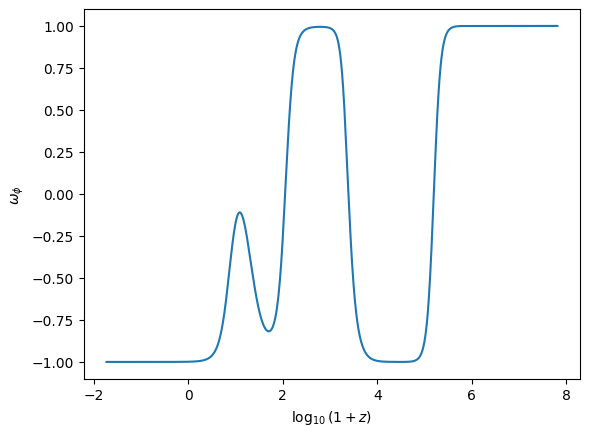

In [13]:
# Equation of state 

P_phi = (1/6)*E_squared*(deri_phi)**2 - V(lamb,phi,n) - omega_dark
rho_phi = (1/6)*E_squared*(deri_phi)**2 + V(lamb,phi,n) + omega_dark

w_phi = P_phi/rho_phi

plt.plot(T/np.log(10),w_phi)
plt.ylabel('$\omega_{\phi}$')
plt.xlabel('$\log_{10}(1 + z)$')